In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df = df.rename(columns = {'CustomerID':'customer_id','Gender':'gender','Age':'age','Annual Income (k$)':'annual_income','Spending Score (1-100)':'spending_score'})
df.head(5)

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [11]:
df.isnull().sum()

customer_id       0
gender            0
age               0
annual_income     0
spending_score    0
dtype: int64

### Plotting Histograms 

Text(0.5, 1.0, 'Age Distribution')

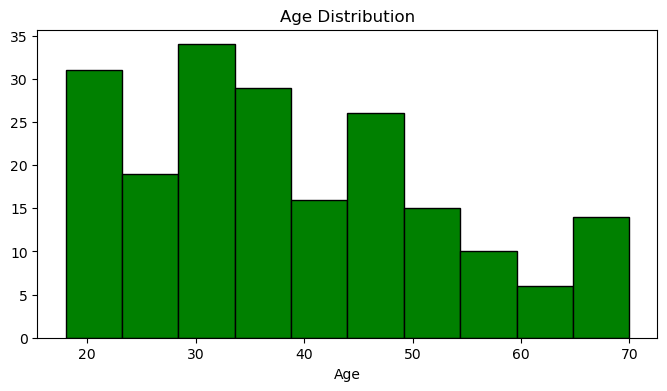

In [18]:
plt.figure(figsize = (8,4))
plt.hist(df['age'], color = 'green', edgecolor = 'black')
plt.xlabel('Age')
plt.title('Age Distribution')

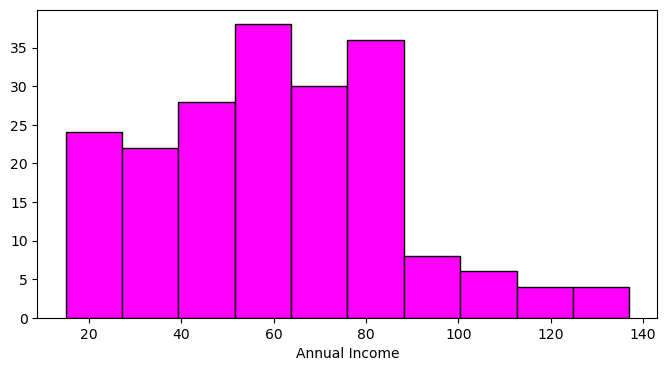

In [19]:
plt.figure(figsize = (8,4))
plt.hist(df['annual_income'], color = 'magenta', edgecolor = 'black')
plt.xlabel('Annual Income')
plt.show()

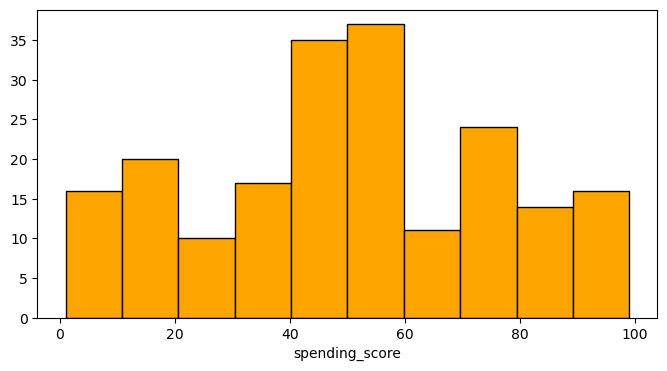

In [21]:
plt.figure(figsize = (8,4))
plt.hist(df['spending_score'], color = 'orange', edgecolor = 'black')
plt.xlabel('spending_score')
plt.show()

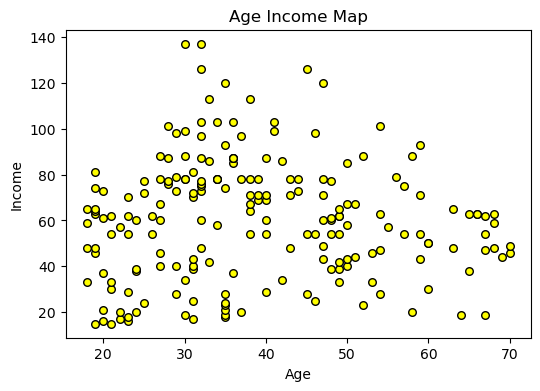

In [24]:
plt.figure(figsize = (6,4))
plt.scatter(df['age'], df['annual_income'], color = 'yellow', s = 30, edgecolor = 'black')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Age Income Map')
plt.show()

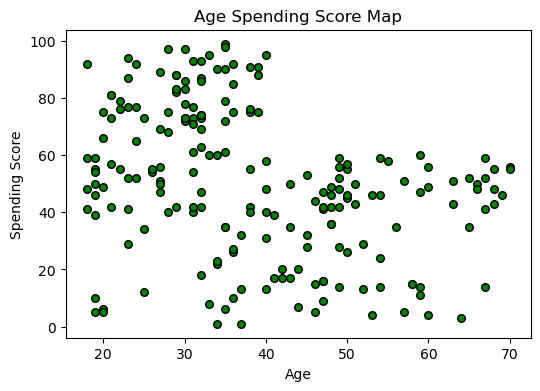

In [25]:
plt.figure(figsize = (6,4))
plt.scatter(df['age'], df['spending_score'], color = 'green', edgecolor = 'black', s = 30)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Age Spending Score Map')
plt.show()

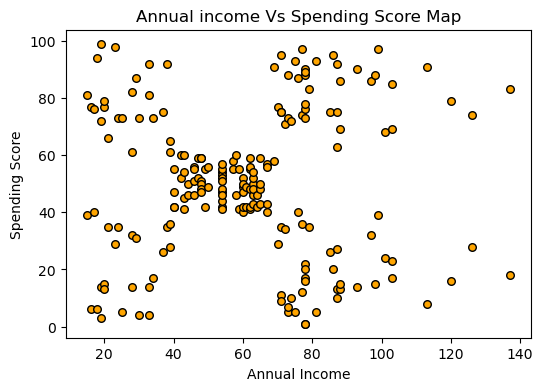

In [27]:
plt.figure(figsize = (6,4))
plt.scatter(df['annual_income'], df['spending_score'], color = 'orange', edgecolor = 'black', s = 30)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Annual income Vs Spending Score Map')
plt.show()

In [49]:
X = df.iloc[:,[3,4]]
X.head(4)

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77


In [50]:
X = X.values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [30]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, 'Distances')

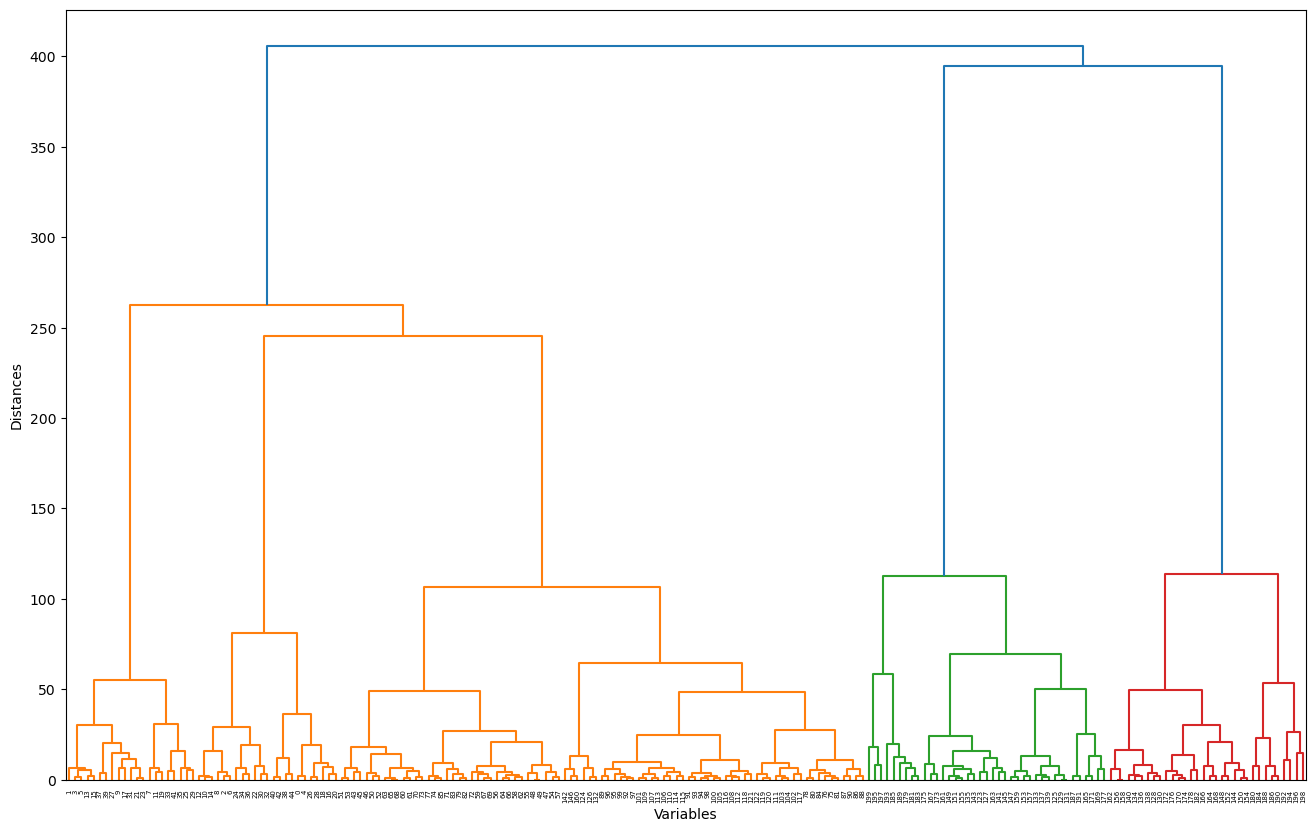

In [33]:
plt.figure(figsize = (16,10))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.xlabel('Variables')
plt.ylabel('Distances')
                            

In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
hc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

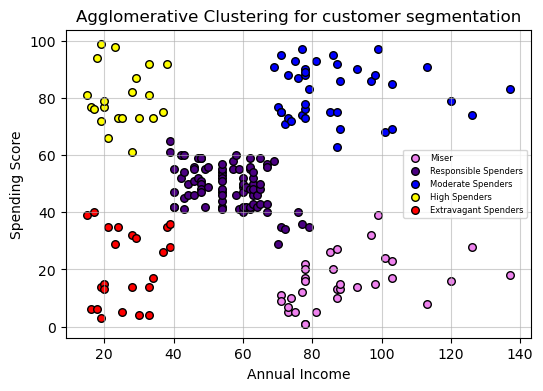

In [54]:
plt.figure(figsize = (6,4))
clusters = {
    0:['Miser','violet'],
    1:['Responsible Spenders','indigo'],
    2:['Moderate Spenders', 'blue'],
    3:['High Spenders','yellow'],
    4:['Extravagant Spenders','red']}

for cluster, (label, color) in clusters.items():
    mask = y_hc == cluster
    plt.scatter(X[mask,0], X[mask,1], c = color, label = label, edgecolor = 'black', s = 30)
    plt.xlabel('Annual Income')
    plt.ylabel('Spending Score')
    plt.title('Agglomerative Clustering for customer segmentation')
    plt.legend(loc = 'center right', fontsize = 6)
    plt.grid(True, alpha = 0.6)